In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [4]:
matches.shape, deliveries.shape

((756, 18), (20736, 21))

In [5]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
matches['Season'].value_counts()

,count
Season,
IPL-2013,76
IPL-2012,74
IPL-2011,73
IPL-2010,60
IPL-2016,60
IPL-2018,60
IPL-2019,60
IPL-2014,60
IPL-2017,59


In [7]:
matches['city'].value_counts()

,count
city,
Mumbai,101
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38


In [8]:
matches['city'].nunique()

32

In [9]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
deliveries['match_id'].nunique()

89

In [11]:
totalrun_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
174,87,1,187.0
175,87,2,188.0
176,88,1,129.0
177,88,2,124.0


In [12]:
totalrun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_id    179 non-null    int64  
 1   inning      179 non-null    int64  
 2   total_runs  179 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.3 KB


In [13]:
# Capturing only the first innings, as we will be predicting for the second innings

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

,match_id,inning,total_runs
0,1,1,208.0
2,2,1,185.0
4,3,1,184.0
6,4,1,164.0
8,5,1,158.0
...,...,...,...
170,85,1,145.0
172,86,1,104.0
174,87,1,188.0
176,88,1,130.0


In [14]:
totalrun_df.columns

Index(['match_id', 'inning', 'total_runs'], dtype='object')

In [15]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [16]:
print(totalrun_df['match_id'].nunique())
print(matches['id'].nunique())

89
756


In [17]:
'''
Merging the total first innings score df with the matches df,
where left side merging is done on 'id' columns for the matches and
right side merging is done on 'match_id' column of the totalrun_df
'''

match_df = matches.merge(totalrun_df[['match_id','total_runs']], left_on='id', right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,IPL-2008,Chennai,06-05-2008,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,AC Gilchrist,"MA Chidambaram Stadium, Chepauk",MR Benson,RB Tiffin,NaN,85,145.0
85,86,IPL-2008,Mumbai,07-05-2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN,86,104.0
86,87,IPL-2008,Delhi,08-05-2008,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN,87,188.0
87,88,IPL-2008,Kolkata,08-05-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN,88,130.0


In [18]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [19]:
match_df['team1'].nunique()

11

In [20]:
match_df['team2'].nunique()

11

In [21]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers'],
      dtype=object)

In [22]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore',

    'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings',
         'Rajasthan Royals','Delhi Capitals'


]

In [23]:
# Replacing the Delhi Daredevils WITH Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# Replacing the Deccan Chargers WITH Sunrisers Hyderabad
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [24]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals'], dtype=object)

In [25]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [26]:
match_df.shape

(89, 20)

In [27]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [28]:
# Will consider only frequently occuring teams, which are mentioned in the team list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [29]:
match_df.shape

(61, 20)

In [30]:
match_df['team1'].value_counts()

,count
team1,
Sunrisers Hyderabad,14
Royal Challengers Bangalore,8
Kolkata Knight Riders,8
Kings XI Punjab,8
Delhi Capitals,7
Mumbai Indians,7
Chennai Super Kings,6
Rajasthan Royals,3


In [31]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159.0


In [32]:
match_df['dl_applied'].value_counts()

,count
dl_applied,
0,60
1,1


In [33]:
15/641*100

2.3400936037441498

In [34]:
match_df[match_df['dl_applied']==1].style.background_gradient(cmap='plasma')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129.000000


In [35]:
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0


In [36]:
# Ignoring the rows which were DL method applied

match_df = match_df[match_df['dl_applied']==0]

# considering match_id, city, winner, total_runs

match_df = match_df[['match_id', 'city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208.0
4,5,Bangalore,Royal Challengers Bangalore,158.0
6,7,Mumbai,Mumbai Indians,179.0
7,8,Indore,Kings XI Punjab,149.0
9,10,Mumbai,Mumbai Indians,159.0
10,11,Kolkata,Kolkata Knight Riders,171.0
11,12,Bangalore,Mumbai Indians,143.0
13,14,Kolkata,Kolkata Knight Riders,173.0
14,15,Delhi,Delhi Daredevils,189.0
17,18,Delhi,Kolkata Knight Riders,169.0


In [37]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [38]:
# Merging match_df with deliveries on match_id

delivery_df = match_df.merge(deliveries, on='match_id')
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [39]:
delivery_df[['total_runs_x','total_runs_y']].head(20)

,total_runs_x,total_runs_y
0,208.0,0.0
1,208.0,0.0
2,208.0,4.0
3,208.0,0.0
4,208.0,2.0
5,208.0,0.0
6,208.0,1.0
7,208.0,1.0
8,208.0,4.0
9,208.0,1.0


In [40]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [41]:
# Considering the 2nd innings

delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df.head(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
130,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
131,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
132,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
133,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
134,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [42]:
delivery_df.shape

(6592, 24)

In [43]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y']).fillna(0)
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [44]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,MV Boucher,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,115.0
13850,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,MV Boucher,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,117.0
13851,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,MV Boucher,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,119.0
13852,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,MV Boucher,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,120.0


In [45]:
# runs left
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,MV Boucher,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,115.0,15.0
13850,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,MV Boucher,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,117.0,13.0
13851,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,MV Boucher,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,119.0,11.0
13852,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,MV Boucher,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,120.0,10.0


In [46]:
# balls left
"""
if one ball is played, then balls left = 120-1 = 119 .............case 1
similarly, 120-2 = 118, 120-3 = 117....

so similarly, if over = 1, over has 6 balls, right, so 1*6 = 6
now, ball = 1, so 6+1 = 7, now = 126 -7 = 119, which is same as (case 1)

so we'll use ball_left = 126 - (over*6 + current_ball) ***************************************
......

"""

delivery_df['balls_left'] = 126 - (delivery_df['over']*6 +  delivery_df['ball'])
delivery_df.head(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0,119
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,118
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,117
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0,116
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0,115
130,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,11.0,197.0,114
131,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,11.0,197.0,113
132,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,11.0,197.0,112
133,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,12.0,196.0,111
134,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,12.0,196.0,110


In [47]:
delivery_df['player_dismissed'].unique()

array([nan, 'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head',
       'Sachin Baby', 'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills',
       'YS Chahal', 'AP Tare', 'KK Nair', 'SW Billings', 'SV Samson',
       'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'RR Pant', 'S Nadeem',
       'PA Patel', 'JC Buttler', 'RG Sharma', 'KH Pandya', 'KA Pollard',
       'N Rana', 'M Vohra', 'AR Patel', 'SP Narine', 'RV Uthappa',
       'MJ McClenaghan', 'S Dhawan', 'DA Warner', 'MC Henriques',
       'DJ Hooda', 'Yuvraj Singh', 'BCJ Cutting', 'WP Saha', 'HM Amla',
       'EJG Morgan', 'GJ Maxwell', 'DA Miller', 'MM Sharma',
       'KC Cariappa', 'C de Grandhomme', 'G Gambhir', 'YK Pathan',
       'SA Yadav', 'CR Woakes', 'I Sharma', 'AD Mathews', 'SS Iyer',
       'CJ Anderson', 'K Rabada', 'V Kohli', 'AB de Villiers', 'P Negi',
       'S Badree', 'MK Pandey', 'MJ Guptill', 'SE Marsh', 'Anureet Singh',
       'SP Jackson', 'KV Sharma', 'A Choudhary', 'MN Samuels',
       'Mohammed Shami', 'Z Khan

In [48]:
# filling nan values with 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

# converting string to int
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

delivery_df['player_dismissed'].unique()

array([0, 1])

In [49]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1.0,0,NaN,NaN,1.0,207.0,119
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,118
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,117
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2.0,0,NaN,NaN,3.0,205.0,116
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4.0,0,NaN,NaN,7.0,201.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,MV Boucher,...,0.0,0.0,0.0,0.0,0,NaN,NaN,115.0,15.0,28
13850,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,MV Boucher,...,0.0,2.0,0.0,2.0,0,NaN,NaN,117.0,13.0,27
13851,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,MV Boucher,...,0.0,2.0,0.0,2.0,0,NaN,NaN,119.0,11.0,26
13852,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,MV Boucher,...,0.0,1.0,0.0,1.0,0,NaN,NaN,120.0,10.0,25


In [50]:
# wickets fallen

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values.astype(int)

delivery_df['wickets'] = 10-wickets

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,207.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,205.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,201.0,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,MV Boucher,...,0.0,0.0,0.0,0,NaN,NaN,115.0,15.0,28,6
13850,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,MV Boucher,...,2.0,0.0,2.0,0,NaN,NaN,117.0,13.0,27,6
13851,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,MV Boucher,...,2.0,0.0,2.0,0,NaN,NaN,119.0,11.0,26,6
13852,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,MV Boucher,...,1.0,0.0,1.0,0,NaN,NaN,120.0,10.0,25,6


In [51]:
wickets

array([0, 0, 0, ..., 4, 4, 4])

In [52]:
# current run rate

delivery_df['current_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required_run_rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])



In [53]:
delivery_df.tail(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,current_run_rate,req_run_rate
13834,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,13,6,CL White,...,2.0,0,NaN,NaN,90.0,40.0,42,7,6.923077,5.714286
13835,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,13,7,MV Boucher,...,1.0,0,NaN,NaN,91.0,39.0,41,7,6.911392,5.707317
13836,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,1,MV Boucher,...,1.0,0,NaN,NaN,92.0,38.0,41,7,6.987342,5.560976
13837,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,2,CL White,...,1.0,0,NaN,NaN,93.0,37.0,40,7,6.975000,5.550000
13838,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,3,MV Boucher,...,0.0,0,NaN,NaN,93.0,37.0,39,7,6.888889,5.692308
13839,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,4,MV Boucher,...,1.0,0,NaN,NaN,94.0,36.0,38,7,6.878049,5.684211
13840,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,5,CL White,...,1.0,0,NaN,NaN,95.0,35.0,37,7,6.867470,5.675676
13841,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,6,MV Boucher,...,1.0,0,NaN,NaN,96.0,34.0,36,7,6.857143,5.666667
13842,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,15,1,MV Boucher,...,0.0,1,run out,M Kartik,96.0,34.0,35,6,6.776471,5.828571
13843,88,Kolkata,Kolkata Knight Riders,130.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,15,2,MV Boucher,...,4.0,0,NaN,NaN,100.0,30.0,34,6,6.976744,5.294118


In [54]:
def resultfun(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [55]:
delivery_df['result'] = delivery_df.apply(resultfun, axis=1)
delivery_df.head(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,current_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1.0,207.0,119,10,6.000000,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1.0,207.0,118,10,3.000000,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1.0,207.0,117,10,2.000000,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3.0,205.0,116,10,4.500000,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7.0,201.0,115,10,8.400000,10.486957,0
130,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,NaN,NaN,11.0,197.0,114,10,11.000000,10.368421,0
131,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,NaN,NaN,11.0,197.0,113,10,9.428571,10.460177,0
132,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,NaN,NaN,11.0,197.0,112,10,8.250000,10.553571,0
133,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,NaN,NaN,12.0,196.0,111,10,8.000000,10.594595,0
134,1,Hyderabad,Sunrisers Hyderabad,208.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,NaN,NaN,12.0,196.0,110,10,7.200000,10.690909,0


In [56]:
delivery_df['result'].value_counts()

,count
result,
1,3548
0,3044


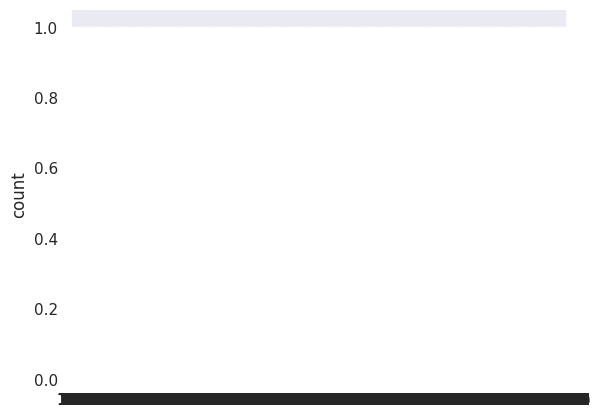

In [57]:
sns.countplot(delivery_df['result'])
plt.show()

In [58]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'current_run_rate',
       'req_run_rate', 'result'],
      dtype='object')

In [59]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','current_run_rate',
                       'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,208.0,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,208.0,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,208.0,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,208.0,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,208.0,8.4,10.486957,0


In [60]:
final_df.shape

(6592, 10)

In [61]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
current_run_rate,0
req_run_rate,0
result,0


In [62]:
832/72413*100

1.148964964854377

In [63]:
# dropping of null values
final_df = final_df.dropna()
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
current_run_rate,0
req_run_rate,0
result,0


In [64]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,208.0,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,208.0,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,208.0,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,208.0,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,208.0,8.4,10.486957,0


In [65]:
final_df['balls_left'].value_counts()

,count
balls_left,
113,75
71,75
83,72
65,72
101,71
...,...
3,26
2,25
1,23


In [66]:
final_df = final_df[final_df['balls_left'] !=0]
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,208.0,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,208.0,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,208.0,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,208.0,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,208.0,8.4,10.486957,0


In [67]:
final_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Delhi Daredevils',
       'Mumbai Indians', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers'], dtype=object)

In [68]:
final_df['balls_left'].value_counts()

,count
balls_left,
113,75
71,75
83,72
65,72
101,71
...,...
4,26
3,26
2,25


In [69]:
data = final_df.copy()
test = data['result']
train = data.drop(['result'], axis=1)
train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,208.0,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,208.0,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,208.0,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,208.0,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,208.0,8.4,10.486957


In [70]:
train['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Delhi Daredevils',
       'Mumbai Indians', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers'], dtype=object)

In [71]:
test.head()

,result
125,0
126,0
127,0
128,0
129,0


In [72]:
test.value_counts()

,count
result,
1,3546
0,3027


In [73]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=1,stratify=test)

In [74]:
x_train.shape, x_test.shape

((5258, 9), (1315, 9))

In [75]:
x_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'current_run_rate', 'req_run_rate'],
      dtype='object')

In [76]:
x_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,req_run_rate
5541,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,54.0,81,9,159.0,16.153846,4.000000
1089,Mumbai Indians,Sunrisers Hyderabad,Mumbai,158.0,118,10,159.0,3.000000,8.033898
8589,Delhi Daredevils,Deccan Chargers,Hyderabad,135.0,113,10,143.0,6.857143,7.168142
1433,Kolkata Knight Riders,Kings XI Punjab,Kolkata,6.0,22,8,171.0,10.102041,1.636364
4160,Kings XI Punjab,Delhi Daredevils,Chandigarh,52.0,107,10,68.0,7.384615,2.915888


In [77]:
x_train.city.unique()

array(['Bangalore', 'Mumbai', 'Hyderabad', 'Kolkata', 'Chandigarh',
       'Jaipur', 'Chennai', 'Delhi', 'Indore'], dtype=object)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [79]:
# batting_team, bowling_team and city are categorical columns/variables
# they will be converted to numeric using onehot encoder method

cf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), ['batting_team', 'bowling_team',
                                          'city'])],
    remainder='passthrough'
)

In [80]:
cf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf', OneHotEncoder(drop='first'),
                                 ['batting_team', 'bowling_team', 'city'])])

### Creating the pipeline with LogisticRegression

In [81]:
pipe = Pipeline(steps=[
    ('step1', cf),('step2', LogisticRegression(solver='liblinear') )])

In [82]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [83]:
# fitting the training data
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [84]:
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9771863117870723


In [85]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       606
           1       0.99      0.97      0.98       709

    accuracy                           0.98      1315
   macro avg       0.98      0.98      0.98      1315
weighted avg       0.98      0.98      0.98      1315



In [86]:
# Reality Check : 0 (loose the match prob) - 46% and 1 (win probability)-53%
pipe.predict_proba(x_test)[10]

array([1.25255748e-05, 9.99987474e-01])

In [87]:
pipe2 = Pipeline(steps=[
    ('step1', cf),('step2', RandomForestClassifier() )])
pipe2.fit(x_train, y_train)
print(metrics.accuracy_score(y_test, pipe2.predict(x_test)))

1.0


In [88]:
print(metrics.classification_report(y_test, pipe2.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       709

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



In [89]:
# Reality Check : 0 (loose the match prob) - 46% and 1 (win probability)-53%
pipe2.predict_proba(x_test)[10]

array([0.02, 0.98])

### I will go with Logistic Regression because i need to showcase the probability score

#### saving the logistic Regression model

In [90]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))

In [91]:
print(delivery_df['total_runs_y'].unique())
print(delivery_df['total_runs_y'].dtype)

[1. 0. 2. 4. 6. 3. 5. 7.]
float64


In [92]:
print(delivery_df['player_dismissed'].dtype)

int64
